In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import scale
import librosa as lr
from librosa import display, feature
from IPython.display import Audio
from librosa.util.exceptions import ParameterError

In [2]:
urban_df = pd.read_csv('/scratch/ci411/UrbanSound8K/metadata/UrbanSound8K.csv')
urban_df['fold'].describe()

count    8732.000000
mean        5.385937
std         2.846820
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: fold, dtype: float64

In [3]:
def get_file(info):
    fold = str(info['fold'])
    name = info['slice_file_name']
    file = '/scratch/ci411/UrbanSound8K/audio/fold' + fold + '/' + name
    return file

/home/ci411/.conda/envs/py3.5/lib/python3.6/site-packages/librosa/display.py:665: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


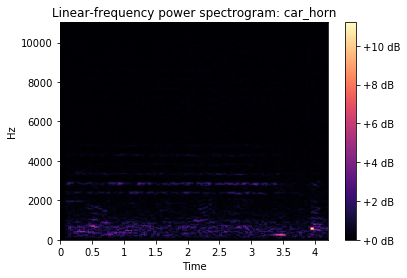

In [4]:
example = urban_df.iloc[10]
name = example['class']
audio, sr = lr.core.load(get_file(example))
stft = lr.core.stft(audio, n_fft = 512)
lr.display.specshow(stft, x_axis = 'time', y_axis='linear', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram: ' + name)
Audio(data = audio, rate = sr)
plt.show()

In [5]:
mfcc = lr.feature.mfcc(y = audio, sr = sr)
mfccd1 = lr.feature.delta(mfcc)
mfccd2 = lr.feature.delta(mfccd1)
mfcc_f = np.average(mfcc, axis=1)
mfccd1_f = np.average(mfccd1, axis=1)
mfccd2_f = np.average(mfccd2, axis=1)
feature_vec = np.concatenate([mfcc_f, mfccd1_f, mfccd2_f])
feature_vec


array([-1.94861084e+02,  9.99860137e+01, -1.73486872e+01,  3.64278159e+00,
       -1.57446584e+01, -2.16185887e+01, -1.53619000e+01, -5.42078892e+00,
       -1.86831483e+01,  5.96693158e-01, -1.28772167e+01, -2.28604376e+00,
       -1.68720238e+01, -9.98185532e-01, -7.52540536e+00, -8.74105561e+00,
       -9.09765624e+00, -6.03160325e+00, -1.02134695e+01, -7.72782490e-01,
        1.59521994e+00,  8.75670358e-02,  3.17404567e-01, -6.23391383e-01,
       -2.27040409e-01,  1.91003084e-01, -2.04448812e-01,  1.95236068e-03,
       -2.80702486e-01,  9.23570911e-02,  1.34032724e-01, -1.20879536e-01,
       -9.18620722e-02, -3.32883063e-02,  5.07515959e-02,  1.34116480e-02,
       -3.33219794e-01,  3.09719174e-02, -1.68213637e-01,  7.74927727e-02,
       -3.03660900e-01, -6.23656373e-02,  1.76764103e-03, -5.55399583e-02,
       -3.85825544e-02, -8.10498715e-02, -6.52309696e-02,  4.34450977e-02,
        9.13863642e-02,  1.17691709e-02,  5.21770388e-02,  1.09849710e-02,
        9.55730570e-02,  

In [6]:
def get_features(info, n_mfcc=20):
    try:
        file = get_file(info)
        audio, sr = lr.core.load(file)
        label = info['class']
        stft = lr.core.stft(audio, n_fft = 512)
        mfcc = lr.feature.mfcc(y = audio, sr = sr)
        mfccd1 = lr.feature.delta(mfcc)
        mfccd2 = lr.feature.delta(mfccd1)
        feature = np.empty(3*n_mfcc)
        feature[:n_mfcc] = np.average(mfcc, axis=1)
        feature[n_mfcc:2*n_mfcc] = np.average(mfccd1, axis=1)
        feature[2*n_mfcc:] = np.average(mfccd2, axis=1)
    except ParameterError:
        return np.zeros(3*n_mfcc).reshape(-1, 3*n_mfcc)
    except Exception:
        print(row)
    return pd.Series(feature)


In [24]:
labels = ['mfcc_'+str(i) for i in range(60)]
feat_df = pd.DataFrame(columns=labels)
for i, row in urban_df.iloc[:5].iterrows():
    feat_df.append((get_features(row)))
    


TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [18]:
df_feats = pd.read_csv('feat_df4.csv')

In [20]:
df_feats.columns
df_feats.reindex(df_feats['Unnamed: 0']).drop()

,Unnamed: 0,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,mfcc_50,mfcc_51,mfcc_52,mfcc_53,mfcc_54,mfcc_55,mfcc_56,mfcc_57,mfcc_58,mfcc_59
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100,1611.0,-152.403174,14.278786,-49.325760,25.417144,-12.209150,-7.626344,2.799913,10.326809,-19.368516,...,-0.001046,0.001821,-0.001051,0.002572,0.008375,0.007538,0.005527,0.008795,-0.000412,-0.005645
536,5004.0,-328.203215,80.917341,-2.505480,48.927863,-16.929015,27.446853,-22.548576,22.602190,-13.631349,...,0.003580,0.000555,0.002754,-0.005803,-0.001302,0.002656,-0.013697,0.006909,0.000792,-0.001469
537,5005.0,-328.766273,82.400059,-2.974580,48.378547,-15.021019,26.867756,-21.749899,24.092986,-15.353210,...,0.007826,0.010854,0.007684,0.010435,0.015699,0.001525,-0.002559,-0.001257,-0.001194,-0.006205
538,5006.0,-331.066734,83.059136,-2.808101,47.180278,-14.596258,27.092493,-22.732698,24.286392,-15.796628,...,-0.002316,0.000344,0.004465,0.008458,-0.000919,-0.005711,-0.018444,-0.006197,-0.002339,-0.002074
539,5007.0,-331.288379,83.201442,-1.980945,47.358259,-15.760111,26.763577,-22.727444,24.039780,-15.478361,...,-0.001939,-0.001190,-0.003788,-0.009095,-0.005216,-0.002561,-0.004732,0.007324,0.006701,0.001334
540,5008.0,-328.781139,78.592371,-3.574414,48.536502,-17.516895,25.843391,-22.953030,23.572130,-13.566713,...,0.006096,-0.003520,0.014911,-0.022488,0.009922,-0.019854,-0.014653,0.007690,-0.005784,-0.003575
541,5009.0,-325.658454,81.079599,-4.076295,46.309687,-17.202603,27.161446,-23.845967,24.318788,-14.542974,...,0.012266,0.002286,0.007116,0.007297,-0.007318,-0.006288,0.005403,-0.003370,0.003159,-0.007890
599,5666.0,-89.477347,132.014201,-39.364609,40.144349,-19.031563,9.356635,-10.042549,8.984063,-4.095997,...,0.008635,-0.005273,0.008108,-0.008184,0.004159,0.000936,0.021387,0.005354,-0.001637,0.005455
600,5667.0,-72.131583,118.503843,-38.201551,37.552846,-19.876704,12.628810,-6.495761,10.178719,-2.649825,...,0.000359,-0.001039,0.013842,0.003325,0.004482,-0.005956,0.006337,-0.006783,0.013150,-0.000624
